0.8133558302578192


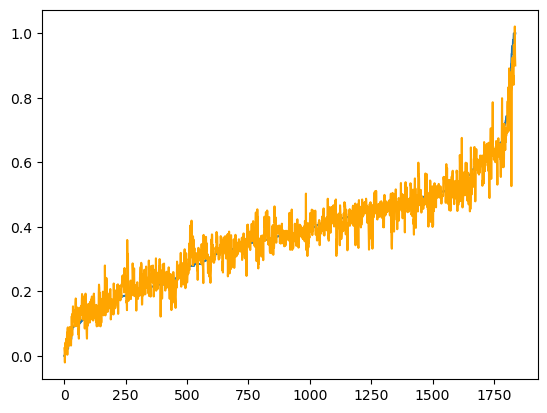

C:\Users\knzss\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\knzss\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\knzss\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\knzss\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\knzss\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


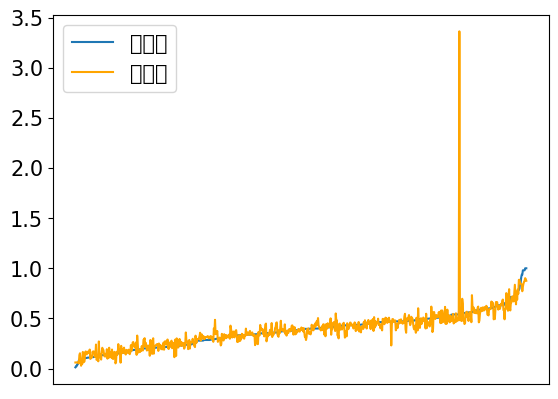

0.01264416237121464


In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error



df = pd.read_csv('광주_날짜_생산자물가.csv', encoding = 'cp949')

y = df['가격'].values
x = df.drop(['가격'], axis = 1)

model = Ridge(alpha=0.1, fit_intercept=False, max_iter=10000)

c_y = (y - min(y)) / (max(y) - min(y))

X_train, X_test, y_train, y_test = train_test_split(x, c_y, test_size=0.3, random_state=42)


mms = MinMaxScaler().fit(X_train)
mms_train_x = mms.transform(X_train)
mms_test_x = mms.transform(X_test)

# 예측값 빼고 실제값 공식 계산 민스퀘어드에러
# 뺼셈해서 히스토그램

q = PolynomialFeatures(degree = 8)
x_q = q.fit_transform(mms_train_x)
x_tt_q = q.transform(mms_test_x)

X_train = x_q

test_x = mms.transform(X_test)
test_x = q.transform(test_x)

model.fit(X_train, y_train)
y_pred = model.predict(test_x)
y_train_pred = model.predict(X_train)

df_show = pd.DataFrame(np.concatenate([y_train.reshape(-1, 1), y_train_pred.reshape(-1, 1)], axis = 1), columns = ['y_train', 'y_train_pred'])
df_show = df_show.sort_values(by = 'y_train').reset_index(drop = True)
plt.plot(df_show['y_train'])
plt.plot(df_show['y_train_pred'], color = 'orange')
plt.show()

df_show = pd.DataFrame(np.concatenate([y_test.reshape(-1, 1), y_pred.reshape(-1, 1)], axis = 1), columns = ['y_test', 'y_pred'])
df_show = df_show.sort_values(by = 'y_test').reset_index(drop = True)
plt.plot(df_show['y_test'], label = "실제값")
plt.plot(df_show['y_pred'], color = 'orange', label = "예측값")
plt.xticks([])

plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

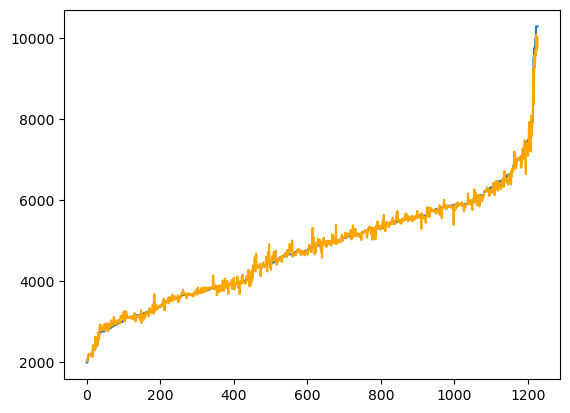

C:\Users\knzss\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\knzss\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\knzss\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\knzss\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


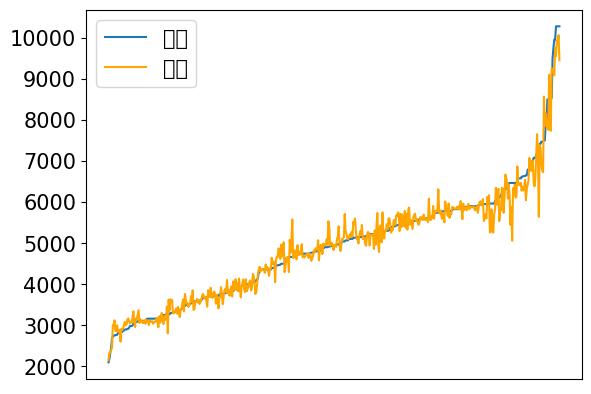

In [8]:
from sklearn.ensemble import RandomForestRegressor

end_df = df
train_df = end_df[end_df['연'] < 2021] 
test_df = end_df[end_df['연'] == 2021] 

y = train_df['가격'].values
x = train_df.drop(['가격'], axis = 1)
test_x = test_df.drop(['가격'], axis = 1)
test_y = test_df['가격'].values


model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

df_show = pd.DataFrame(np.concatenate([y_train.reshape(-1, 1), y_train_pred.reshape(-1, 1)], axis = 1), columns = ['y_train', 'y_train_pred'])
df_show = df_show.sort_values(by = 'y_train').reset_index(drop = True)
test = y_test.copy()
test.sort()
plt.plot(df_show['y_train'])
plt.plot(df_show.index, df_show['y_train_pred'], color = 'orange')
plt.show()

df_show = pd.DataFrame(np.concatenate([y_test.reshape(-1, 1), y_pred.reshape(-1, 1)], axis = 1), columns = ['y_test', 'y_pred'])
df_show = df_show.sort_values(by = 'y_test').reset_index(drop = True)

test = y_test.copy()
test.sort()
plt.plot(df_show['y_test'], label = "정답")
plt.plot(df_show.index, df_show['y_pred'], color = 'orange', label = '예측')
plt.xticks([])
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.show()
